In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("preprocessed_IMDB_data.csv")
df

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,im go disagre previou comment side maltin one ...,negative


In [3]:
le = LabelEncoder()

df['sentiment'] = le.fit_transform(df['sentiment'])
df

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagre previou comment side maltin one ...,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=34)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((40000,), (40000,)), ((10000,), (10000,)))

In [5]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

X_train_bow.shape, X_test_bow.shape

((40000, 3000), (10000, 3000))

### Random Forest

In [6]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train_bow, y_train)
preds = rf.predict(X_test_bow)

preds

array([0, 1, 0, ..., 0, 0, 0])

<Axes: >

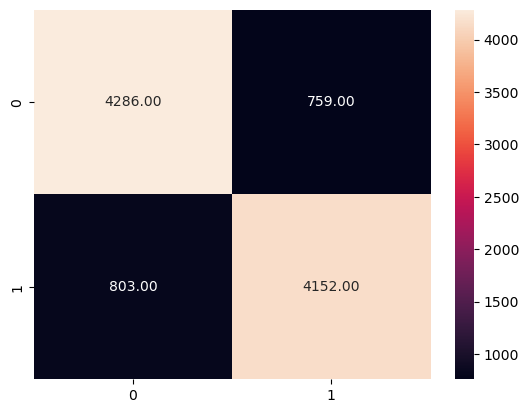

In [7]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='.2f')

In [8]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5045
           1       0.85      0.84      0.84      4955

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [9]:
accuracy_score(preds, y_test)

0.8438

### Support Vector Machines

In [10]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_bow, y_train)
preds = nb.predict(X_test_bow)

preds

array([0, 1, 1, ..., 0, 0, 0])

<Axes: >

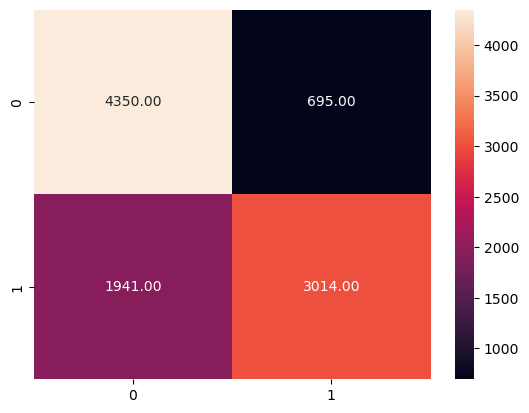

In [11]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='.2f')

In [12]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77      5045
           1       0.81      0.61      0.70      4955

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.73     10000
weighted avg       0.75      0.74      0.73     10000



In [13]:
accuracy_score(preds, y_test)

0.7364

### TF-IDF + Random Forest

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

(X_train_tfidf.shape, y_train.shape), (X_test_tfidf.shape, y_test.shape)

(((40000, 3000), (40000,)), ((10000, 3000), (10000,)))

In [7]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train_tfidf, y_train)
preds = rf.predict(X_test_tfidf)

preds

array([0, 1, 0, ..., 0, 0, 0])

<Axes: >

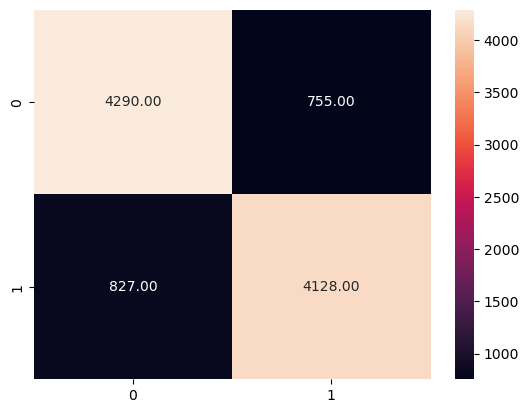

In [8]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='.2f')

In [9]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5045
           1       0.85      0.83      0.84      4955

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [10]:
accuracy_score(preds, y_test)

0.8418